In [1]:
#importing libraries

import matplotlib
import matplotlib.pyplot as plt
import random

import pandas as pd
import numpy as np

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split

import pickle

In [2]:
!curl --header 'Host: doc-14-ak-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://drive.google.com/drive/u/1/folders/1OnWwMWfFQqUwo3ycoxSCEMbFb3tqPFyC' --cookie 'AUTH_dhpdvm22108a4bis5udqhlgg6cpgnhr8=03065800667918059538|1601542650000|dda2bpbpgtpos34fka5q090b86s26vhb' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-14-ak-docs.googleusercontent.com/docs/securesc/1jeft7ic2recc8i87mu2h8f7jvsald4e/4ues2ao6jlpntu9m6mn1fr1ljjrhi7s0/1601542650000/03065800667918059538/03065800667918059538/1xL990eTcn15eFdvyRIrTMZq-rktxFKIc?e=download&authuser=1' --output 'falls.zip'
!curl --header 'Host: doc-08-ak-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://drive.google.com/drive/u/1/folders/1OnWwMWfFQqUwo3ycoxSCEMbFb3tqPFyC' --cookie 'AUTH_dhpdvm22108a4bis5udqhlgg6cpgnhr8=03065800667918059538|1601542650000|dda2bpbpgtpos34fka5q090b86s26vhb' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-08-ak-docs.googleusercontent.com/docs/securesc/1jeft7ic2recc8i87mu2h8f7jvsald4e/0pnrbnmk1k4gv9kev3k5seng9e1m38dd/1601542650000/03065800667918059538/03065800667918059538/1oToKE_l0fL44zvqdRdmfZoMLs_0Lfw9t?e=download&authuser=1' --output 'scalar.pkl'
!curl --header 'Host: doc-14-ak-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://drive.google.com/drive/u/1/folders/1OnWwMWfFQqUwo3ycoxSCEMbFb3tqPFyC' --cookie 'AUTH_dhpdvm22108a4bis5udqhlgg6cpgnhr8_nonce=qi4n8m7cofjd2' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-14-ak-docs.googleusercontent.com/docs/securesc/1jeft7ic2recc8i87mu2h8f7jvsald4e/hlpagqutqj7s3qije2391ucqdp9nitur/1601542650000/03065800667918059538/03065800667918059538/1BB7KOzpnD9-uGOLPc3GZhLrdLzu5womn?e=download&authuser=1&nonce=qi4n8m7cofjd2&user=03065800667918059538&hash=sobp1odn63lctjf8qk64qes5mlrrj4ru' --output 'varriables.pickle'

!unzip /content/falls.zip
!pip install seaborn --upgrade

import seaborn as sns

print(sns.__version__)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.3M    0 21.3M    0     0  20.3M      0 --:--:--  0:00:01 --:--:-- 20.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6100  100  6100    0     0  16397      0 --:--:-- --:--:-- --:--:-- 16397
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20021  100 20021    0     0  93995      0 --:--:-- --:--:-- --:--:-- 93995
Archive:  /content/falls.zip
   creating: falls/
  inflating: falls/equip_failures_test_set.csv  
  inflating: falls/equip_failures_training_set.csv  
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)
0.11.0


###Loading scaler

In [3]:
#Loading Scaler

filename = '/content/scalar.pkl'

	
with open(filename, 'rb') as f:
    scaler = pickle.load(f)

print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


###Loading varriables

In [4]:
#Loading varriables

filename = '/content/varriables.pickle'

with open(filename, 'rb') as f:
    high_nan_features, median, time_based_sensor, bottom_n_features, useless_features = pickle.load(f)

print("high_nan_features = ",high_nan_features)
print("median = ",median)
print("time_based_sensor = ",time_based_sensor)
print("bottom_n_features = ",bottom_n_features)
print("useless_features = ",useless_features)

high_nan_features =  ['sensor2_measure', 'sensor38_measure', 'sensor39_measure', 'sensor40_measure', 'sensor41_measure', 'sensor42_measure', 'sensor43_measure', 'sensor68_measure']
median =  sensor1_measure                 30755.0
sensor3_measure                   152.0
sensor4_measure                   126.0
sensor5_measure                     0.0
sensor6_measure                     0.0
                                 ...   
sensor105_histogram_bin7_nan        0.0
sensor105_histogram_bin8_nan        0.0
sensor105_histogram_bin9_nan        0.0
sensor106_measure_nan               0.0
sensor107_measure_nan               0.0
Length: 332, dtype: float64
time_based_sensor =  [['sensor7_histogram_bin0', 'sensor7_histogram_bin1', 'sensor7_histogram_bin2', 'sensor7_histogram_bin3', 'sensor7_histogram_bin4', 'sensor7_histogram_bin5', 'sensor7_histogram_bin6', 'sensor7_histogram_bin7', 'sensor7_histogram_bin8', 'sensor7_histogram_bin9'], ['sensor24_histogram_bin0', 'sensor24_histogram_bin1', 's

###Loading dataframe

In [5]:
#Loading dataframe
df = pd.read_csv("/content/falls/equip_failures_training_set.csv")

df.head()

id  target  ...  sensor106_measure sensor107_measure
0   1       0  ...                  0                 0
1   2       0  ...                  0                 0
2   3       0  ...                  0                 0
3   4       0  ...                  4                32
4   5       0  ...                  0                 0

[5 rows x 172 columns]

#Preprocessing for modelling

###Replace na with np.nan

In [6]:
"""Instead of nan value we have na, so we will replace na with np.nan"""

df = df.replace('na', np.NaN)
df.head()

id  target  ...  sensor106_measure sensor107_measure
0   1       0  ...                  0                 0
1   2       0  ...                  0                 0
2   3       0  ...                  0                 0
3   4       0  ...                  4                32
4   5       0  ...                  0                 0

[5 rows x 172 columns]

###Change data-type of dataframe

In [7]:
df.dtypes

id                           int64
target                       int64
sensor1_measure              int64
sensor2_measure             object
sensor3_measure             object
                             ...  
sensor105_histogram_bin7    object
sensor105_histogram_bin8    object
sensor105_histogram_bin9    object
sensor106_measure           object
sensor107_measure           object
Length: 172, dtype: object

In [8]:
"We could see that few coloumns are of int type, and other are of object type,So for using data we need to make them float data type"

df = df.astype("float32")
df.dtypes

id                          float32
target                      float32
sensor1_measure             float32
sensor2_measure             float32
sensor3_measure             float32
                             ...   
sensor105_histogram_bin7    float32
sensor105_histogram_bin8    float32
sensor105_histogram_bin9    float32
sensor106_measure           float32
sensor107_measure           float32
Length: 172, dtype: object

###Drop useless coloumn from feature

In [9]:
"""id coloumn is just index, we don't need it , so we will drop it"""
df = df.drop(["id"],axis=1)
df.head()

target  sensor1_measure  ...  sensor106_measure  sensor107_measure
0     0.0          76698.0  ...                0.0                0.0
1     0.0          33058.0  ...                0.0                0.0
2     0.0          41040.0  ...                0.0                0.0
3     0.0             12.0  ...                4.0               32.0
4     0.0          60874.0  ...                0.0                0.0

[5 rows x 171 columns]

###Train test split

###Here we are creating 4 dataset

*    df_train = it donot contain target
*    df_test  = it donot contain target


*    df_train_t  = it contain target for purpose EDA
*    df_test_t  = it contain target for purpose EDA



In [10]:
#We are not dropping target because, target will be used for EDA in next cells

y = df["target"].tolist()
df_ = df.drop(["target"],axis=1)

#For feature engineering
df_train , df_test , y_train , y_test = train_test_split( df_ , y , test_size=0.15, stratify = y ,  random_state=42)


#For EDA
df_train_t , df_test_t , y_train_t , y_test_t = train_test_split( df , y , test_size=0.15, stratify = y ,  random_state=42)


print("train = ",df_train.shape)
print("test = ",df_test.shape)

train =  (51000, 170)
test =  (9000, 170)


([<matplotlib.patches.Wedge at 0x7f315b9ec550>,
 [Text(-0.05756949701481714, -1.0984924911047236, '0'),
  Text(0.05756943916265415, 1.0984924941366225, '1')],
 [Text(-0.03140154382626389, -0.5991777224207583, '98.333'),
  Text(0.03140151227053862, 0.5991777240745213, '1.667')])

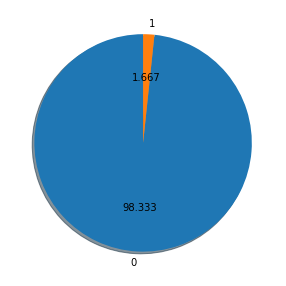

In [11]:
#train Percentage view of data distribution

plt.figure(figsize=(5,5))
plt.pie(df_train_t['target'].value_counts(),startangle=90,autopct="%.3f",labels=[0,1],shadow=True)


([<matplotlib.patches.Wedge at 0x7f315b515080>,
 [Text(-0.05756949701481714, -1.0984924911047236, '0'),
  Text(0.05756943916265415, 1.0984924941366225, '1')],
 [Text(-0.03140154382626389, -0.5991777224207583, '98.333'),
  Text(0.03140151227053862, 0.5991777240745213, '1.667')])

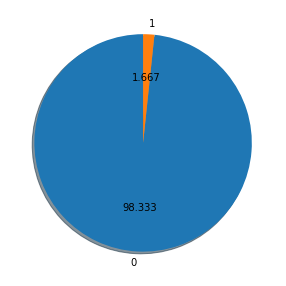

In [12]:
#test Percentage view of data distribution

plt.figure(figsize=(5,5))
plt.pie(df_test_t['target'].value_counts(),startangle=90,autopct="%.3f",labels=[0,1],shadow=True)


###For each feature create new feature, that tells presence of nan, because nan values also contains some information

In [13]:
coloumns = df_train.columns

#Train
for coloumn in tqdm(coloumns):
    df_train[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in df_train[coloumn]]

#Test
for coloumn in tqdm(coloumns):
    df_test[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in df_test[coloumn]]


  0%|          | 0/170 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
  0%|          | 0/170 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
100%|██████████| 170/170 [00:02<00:00, 67.36it/s]


###Drop features with more than 50% nan values

In [14]:
#Train
df_train = df_train.drop(high_nan_features,axis=1)

#Test
df_test = df_test.drop(high_nan_features,axis=1)


df_train.head()

sensor1_measure  ...  sensor107_measure_nan
54001             36.0  ...                    0.0
47399          41968.0  ...                    0.0
49418           7230.0  ...                    0.0
57927         236940.0  ...                    0.0
29123             20.0  ...                    0.0

[5 rows x 332 columns]

###Replace nan with median of that coloumn , because values of each feature is either very low or very high, replacing nan with mean is not sensible at all

In [15]:
#Train
df_train = df_train.fillna(median)

#Test
df_test = df_test.fillna(median)                                     #Here we are filling test nan values with, train median



df_test.head()

sensor1_measure  ...  sensor107_measure_nan
19886            346.0  ...                    0.0
14400          39642.0  ...                    0.0
13932           1142.0  ...                    0.0
49050          78342.0  ...                    0.0
52585           2172.0  ...                    0.0

[5 rows x 332 columns]

###We have 100 simple sensor, and 7 time based sensor. Here we will extract min, max and mean from those time based sensors

In [16]:
def mean(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return np.mean(list_)


def min_(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return min(list_)


def max_(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return max(list_)


In [17]:
#Train
for i in tqdm(range(0,len(time_based_sensor))):
    df_train[time_based_sensor[i][0].split("_")[0] + "_mean"] = df_train.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    df_train[time_based_sensor[i][0].split("_")[0] + "_min"] = df_train.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    df_train[time_based_sensor[i][0].split("_")[0] + "_max"] = df_train.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)




#Test
for i in tqdm(range(0,len(time_based_sensor))):
    df_test[time_based_sensor[i][0].split("_")[0] + "_mean"] = df_test.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    df_test[time_based_sensor[i][0].split("_")[0] + "_min"] = df_test.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    df_test[time_based_sensor[i][0].split("_")[0] + "_max"] = df_test.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


df_train.head()

100%|██████████| 7/7 [00:08<00:00,  1.26s/it]


sensor1_measure  sensor3_measure  ...  sensor105_min  sensor105_max
54001             36.0     1.000000e+01  ...            0.0         8206.0
47399          41968.0     2.130706e+09  ...          786.0       558952.0
49418           7230.0     2.130706e+09  ...            0.0       109634.0
57927         236940.0     2.130706e+09  ...          342.0      3113856.0
29123             20.0     2.200000e+01  ...            0.0         2736.0

[5 rows x 353 columns]

###Removing all the features which are least correlated to our target

In [18]:
#train
df_train = df_train.drop(bottom_n_features.keys(),axis=1)

#test
df_test = df_test.drop(bottom_n_features.keys(),axis=1)


###Removing all the intercorrelated features

In [19]:
#Train
df_train = df_train.drop(useless_features , axis=1)

#Test
df_test = df_test.drop(useless_features , axis=1)

In [20]:
print("train_size = ",df_train.shape)
print("test_size = ",df_test.shape)

train_size =  (51000, 232)
test_size =  (9000, 232)


###Feature Scaling

In [21]:
#Train
df_train = scaler.transform(df_train)

#Test
df_test = scaler.transform(df_test)

###PCA 3d plot

In [22]:

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_train)

x = pca_result[:,0]
y = pca_result[:,1]
z = pca_result[:,2]


In [23]:
import plotly.express as px

pca_df = pd.DataFrame(list(zip(x, y, z, y_train)), columns =['x', 'y', 'z', 'target']) 

fig = px.scatter_3d(pca_df, x='x', y='y', z='z',
              color='target')

fig.update_traces(marker=dict(size=5,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()


In [24]:
y_test = np.array(y_test)
X_test = df_test

#Modelling

###We will over sample our minority(down hole equip fail) using RandomOverSampler

In [25]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


oversample = RandomOverSampler(sampling_strategy='minority')                           

# fit and apply the transform
X_random, y_random = oversample.fit_resample(df_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [26]:

# summarize class distribution
print("distribution before oversampling = ",Counter(y_train))
print("distribution after  oversampling = ",Counter(y_random))
print("-"*50)
print("shape of X_train = ", df_train.shape)
print("shape of y_train = ", len(y_train))
print("-"*50)
print("shape of X_train_over = ", X_random.shape)
print("shape of y_train_over = ", y_random.shape)


distribution before oversampling =  Counter({0.0: 50150, 1.0: 850})
distribution after  oversampling =  Counter({0.0: 50150, 1.0: 50150})
--------------------------------------------------
shape of X_train =  (51000, 232)
shape of y_train =  51000
--------------------------------------------------
shape of X_train_over =  (100300, 232)
shape of y_train_over =  (100300,)


###We will over sample our minority(down hole equip fail) using SMOTE(Synthetic minority over sampling technique)

In [27]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

# fit and apply the transform
X_smote, y_smote = oversample.fit_resample(df_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [28]:

# summarize class distribution
print("distribution before oversampling = ",Counter(y_train))
print("distribution after  oversampling = ",Counter(y_smote))
print("-"*50)
print("shape of X_train = ", df_train.shape)
print("shape of y_train = ", len(y_train))
print("-"*50)
print("shape of X_train_smote_over = ", X_smote.shape)
print("shape of y_train_smote_over = ", y_smote.shape)


distribution before oversampling =  Counter({0.0: 50150, 1.0: 850})
distribution after  oversampling =  Counter({0.0: 50150, 1.0: 50150})
--------------------------------------------------
shape of X_train =  (51000, 232)
shape of y_train =  51000
--------------------------------------------------
shape of X_train_smote_over =  (100300, 232)
shape of y_train_smote_over =  (100300,)


###We will be using f1 score, AUC ,Precison,Recall and Confusion Matrix

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(test_y, predict_y,lables):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = lables
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))


#GaussianNB

##On random over sampled

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

NB = GaussianNB()

parameters = {"var_smoothing":np.logspace(0,-9,num = 10) }

clf = GridSearchCV( NB , parameters , verbose=4 , cv=3 , scoring = "f1" , return_train_score = True)

clf.fit(X_random,y_random)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  var_smoothing=1.0, score=(train=0.532, test=0.534), total=   0.4s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  var_smoothing=1.0, score=(train=0.523, test=0.525), total=   0.3s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  var_smoothing=1.0, score=(train=0.549, test=0.542), total=   0.3s
[CV] var_smoothing=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  var_smoothing=0.1, score=(train=0.803, test=0.806), total=   0.3s
[CV] var_smoothing=0.1 ...............................................
[CV]  var_smoothing=0.1, score=(train=0.804, test=0.802), total=   0.3s
[CV] var_smoothing=0.1 ...............................................
[CV]  var_smoothing=0.1, score=(train=0.807, test=0.807), total=   0.3s
[CV] var_smoothing=0.01 ..............................................
[CV]  var_smoothing=0.01, score=(train=0.881, test=0.878), total=   0.3s
[CV] var_smoothing=0.01 ..............................................
[CV]  var_smoothing=0.01, score=(train=0.884, test=0.882), total=   0.3s
[CV] var_smoothing=0.01 ..............................................
[CV]  var_smoothing=0.01, score=(train=0.879, test=0.885), total=   0.3s
[CV] var_smoothing=0.001 .............................................
[CV]  var_smoothing=0.001, score=(train=0.896, test=0.894), total=   0.3s
[CV] var_smoothing=0.001 ........................................

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=4)

In [31]:
#Creating dataframe for grid search cv results

results_df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["train_f1_score"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["cv_f1_score"])],axis=1)

train_cv_diffrence = abs(np.array(results_df['train_f1_score'].tolist()) - np.array(results_df['cv_f1_score'].tolist()))

results_df = pd.concat([results_df,pd.DataFrame(train_cv_diffrence, columns=["train_cv_diffrence"])],axis=1)

results_df

var_smoothing  train_f1_score  cv_f1_score  train_cv_diffrence
0   1.000000e+00        0.534218     0.533758            0.000461
1   1.000000e-01        0.804726     0.804868            0.000141
2   1.000000e-02        0.881484     0.881719            0.000235
3   1.000000e-03        0.897259     0.897110            0.000149
4   1.000000e-04        0.901760     0.901814            0.000054
5   1.000000e-05        0.904298     0.904180            0.000119
6   1.000000e-06        0.905480     0.905384            0.000097
7   1.000000e-07        0.907217     0.906935            0.000281
8   1.000000e-08        0.908076     0.907724            0.000352
9   1.000000e-09        0.908969     0.908701            0.000268

In [32]:
clf.best_params_

{'var_smoothing': 1e-09}

###f1 score

In [33]:
NB_best = GaussianNB(var_smoothing=1e-09)
NB_best.fit(X_random,y_random)

print("Train F1 Score = ",f1_score(y_random , NB_best.predict(X_random)))
print("Test F1 Score = ",f1_score(y_test , NB_best.predict(X_test)))

Train F1 Score =  0.9094540341152254
Test F1 Score =  0.3023516237402016


###AUC Score

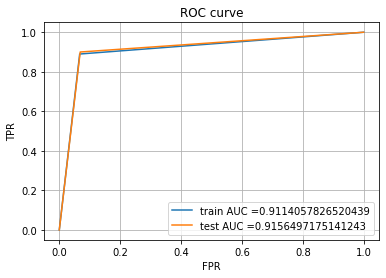

In [34]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_random, NB_best.predict(X_random))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , NB_best.predict(X_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [35]:
print("Train precision Score = ",precision_score(y_random , NB_best.predict(X_random)))
print("Test precision Score = ",precision_score(y_test , NB_best.predict(X_test)))

Train precision Score =  0.9299408185379678
Test precision Score =  0.1816958277254374


###Recall

In [36]:
print("Train recall Score = ",recall_score(y_random , NB_best.predict(X_random)))
print("Test recall Score = ",recall_score(y_test , NB_best.predict(X_test)))

Train recall Score =  0.8898504486540378
Test recall Score =  0.9


###Confusion matrix train

Number of misclassified points  8.859421734795612
-------------------------------------------------- Confusion matrix --------------------------------------------------


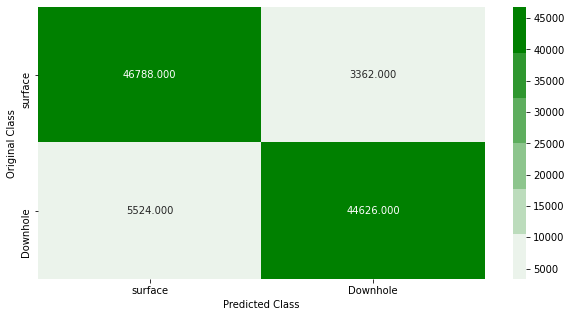

-------------------------------------------------- Precision matrix --------------------------------------------------


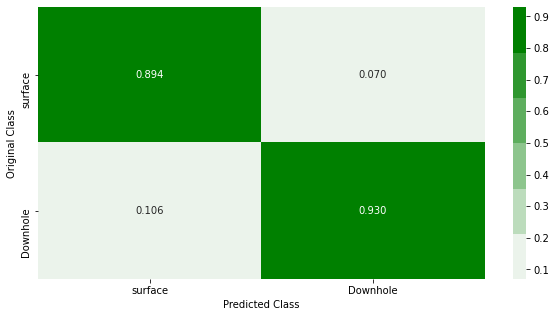

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


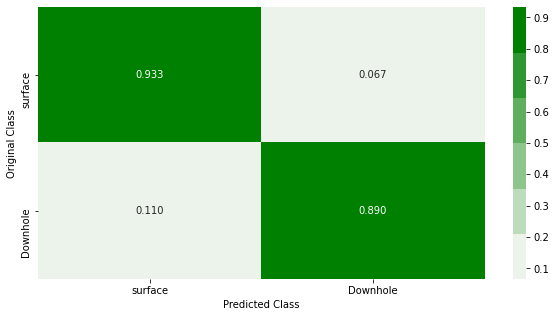

Sum of rows in precision matrix [1. 1.]


In [37]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_random, NB_best.predict(X_random) , lables)

###Confusion  matrix test

Number of misclassified points  6.9222222222222225
-------------------------------------------------- Confusion matrix --------------------------------------------------


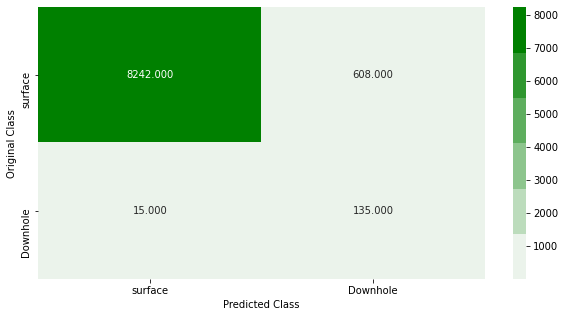

-------------------------------------------------- Precision matrix --------------------------------------------------


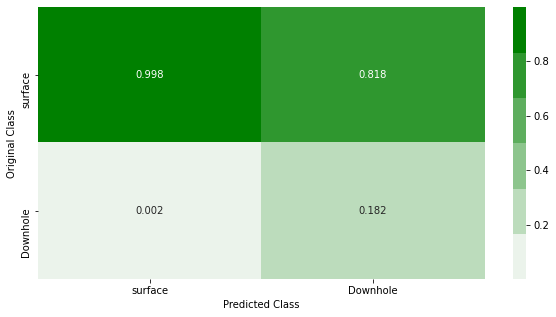

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


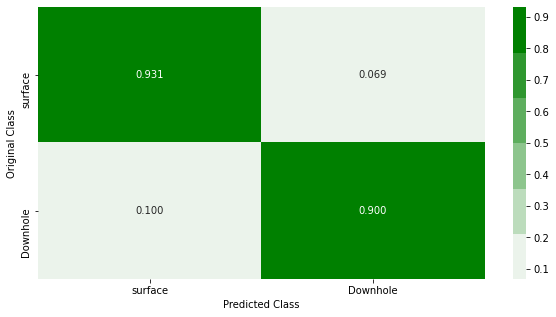

Sum of rows in precision matrix [1. 1.]


In [38]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test, NB_best.predict(X_test) , lables)

##On SMOTE over sampled

In [39]:
NB = GaussianNB()

parameters = {"var_smoothing":np.logspace(0,-9,num = 10) }

clf = GridSearchCV( NB , parameters , verbose=4 , cv=3 , scoring = "f1" , return_train_score = True)

clf.fit(X_smote,y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  var_smoothing=1.0, score=(train=0.590, test=0.593), total=   0.4s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  var_smoothing=1.0, score=(train=0.595, test=0.593), total=   0.3s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  var_smoothing=1.0, score=(train=0.581, test=0.581), total=   0.3s
[CV] var_smoothing=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  var_smoothing=0.1, score=(train=0.809, test=0.810), total=   0.3s
[CV] var_smoothing=0.1 ...............................................
[CV]  var_smoothing=0.1, score=(train=0.811, test=0.813), total=   0.3s
[CV] var_smoothing=0.1 ...............................................
[CV]  var_smoothing=0.1, score=(train=0.804, test=0.802), total=   0.3s
[CV] var_smoothing=0.01 ..............................................
[CV]  var_smoothing=0.01, score=(train=0.872, test=0.872), total=   0.3s
[CV] var_smoothing=0.01 ..............................................
[CV]  var_smoothing=0.01, score=(train=0.876, test=0.876), total=   0.4s
[CV] var_smoothing=0.01 ..............................................
[CV]  var_smoothing=0.01, score=(train=0.870, test=0.871), total=   0.3s
[CV] var_smoothing=0.001 .............................................
[CV]  var_smoothing=0.001, score=(train=0.892, test=0.892), total=   0.3s
[CV] var_smoothing=0.001 ........................................

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=4)

In [40]:
#Creating dataframe for grid search cv results

results_df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["train_f1_score"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["cv_f1_score"])],axis=1)

train_cv_diffrence = abs(np.array(results_df['train_f1_score'].tolist()) - np.array(results_df['cv_f1_score'].tolist()))

results_df = pd.concat([results_df,pd.DataFrame(train_cv_diffrence, columns=["train_cv_diffrence"])],axis=1)

results_df

var_smoothing  train_f1_score  cv_f1_score  train_cv_diffrence
0   1.000000e+00        0.588850     0.588867            0.000017
1   1.000000e-01        0.808038     0.808284            0.000246
2   1.000000e-02        0.872936     0.872959            0.000022
3   1.000000e-03        0.894204     0.894017            0.000187
4   1.000000e-04        0.898592     0.898717            0.000125
5   1.000000e-05        0.901115     0.901095            0.000020
6   1.000000e-06        0.903607     0.903520            0.000087
7   1.000000e-07        0.905600     0.905686            0.000085
8   1.000000e-08        0.906947     0.906952            0.000005
9   1.000000e-09        0.908073     0.908129            0.000057

In [41]:
clf.best_params_

{'var_smoothing': 1e-09}

###f1 score

In [42]:
NB_best = GaussianNB(var_smoothing=1e-09)
NB_best.fit(X_smote,y_smote)

print("Train F1 Score = ",f1_score(y_smote , NB_best.predict(X_smote)))
print("Test F1 Score = ",f1_score(y_test , NB_best.predict(X_test)))

Train F1 Score =  0.9096593446749767
Test F1 Score =  0.29685807150595883


###AUC Score

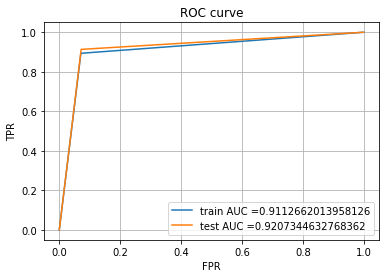

In [43]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_smote, NB_best.predict(X_smote))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , NB_best.predict(X_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [44]:
print("Train precision Score = ",precision_score(y_smote , NB_best.predict(X_smote)))
print("Test precision Score = ",precision_score(y_test , NB_best.predict(X_test)))

Train precision Score =  0.9264359260637638
Test precision Score =  0.17723156532988357


###Recall

In [45]:
print("Train recall Score = ",recall_score(y_smote , NB_best.predict(X_smote)))
print("Test recall Score = ",recall_score(y_test , NB_best.predict(X_test)))

Train recall Score =  0.8934795613160519
Test recall Score =  0.9133333333333333


###Confusion matrix train

Number of misclassified points  8.873379860418744
-------------------------------------------------- Confusion matrix --------------------------------------------------


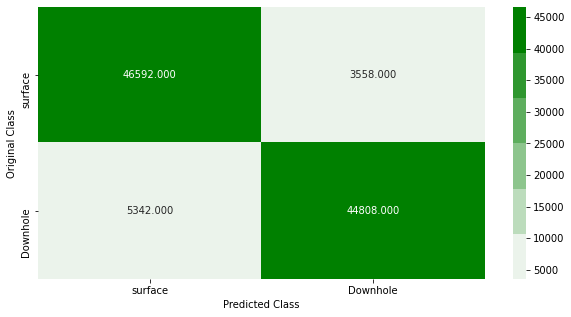

-------------------------------------------------- Precision matrix --------------------------------------------------


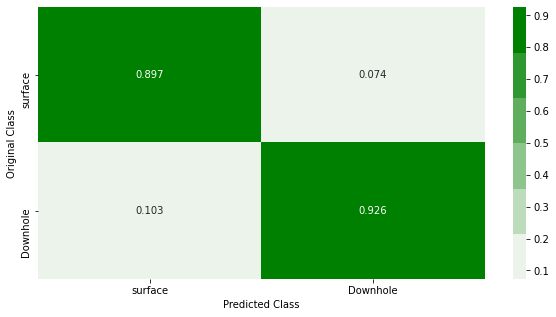

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


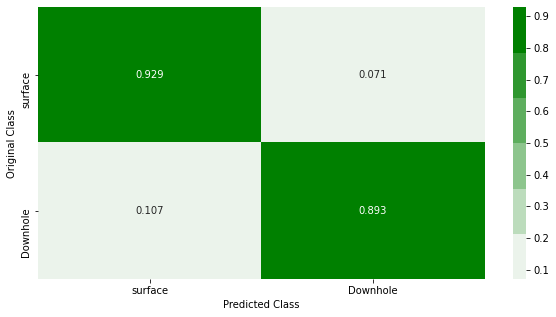

Sum of rows in precision matrix [1. 1.]


In [46]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_smote, NB_best.predict(X_smote) , lables)

###Confusion  matrix test

Number of misclassified points  7.211111111111111
-------------------------------------------------- Confusion matrix --------------------------------------------------


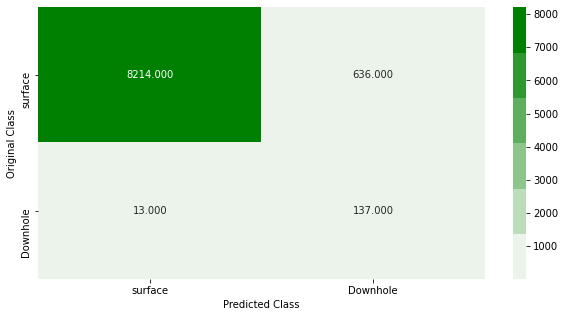

-------------------------------------------------- Precision matrix --------------------------------------------------


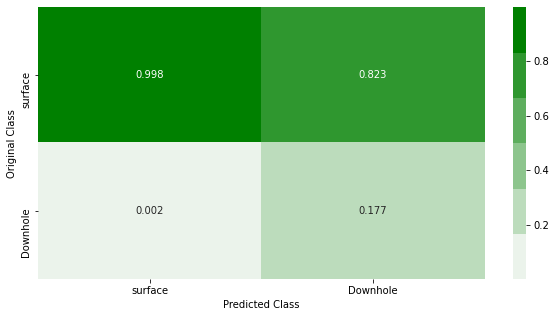

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


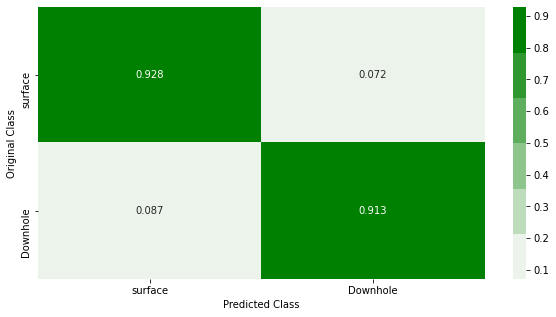

Sum of rows in precision matrix [1. 1.]


In [47]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test, NB_best.predict(X_test) , lables)

#Logistic regression

##On random over sampled

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression(class_weight="balanced" , max_iter = 1000)

parameters = {"C": [100 , 10 , 1.0 , 0.1 , 0.01] }

clf = GridSearchCV( LR , parameters , verbose=4 , cv=3 , scoring = "f1" , return_train_score = True)

clf.fit(X_random,y_random)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=100 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.9s remaining:    0.0s


[CV] ........... C=100, score=(train=0.961, test=0.960), total=  30.8s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV] ........... C=100, score=(train=0.964, test=0.962), total=  30.7s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV] ........... C=100, score=(train=0.961, test=0.962), total=  30.2s
[CV] C=10 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] ............ C=10, score=(train=0.961, test=0.960), total=  30.8s
[CV] C=10 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] ............ C=10, score=(train=0.964, test=0.962), total=  30.6s
[CV] C=10 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] ............ C=10, score=(train=0.960, test=0.961), total=  30.2s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.961, test=0.960), total=  25.3s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.962, test=0.960), total=  24.8s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.960, test=0.961), total=  26.4s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.960, test=0.960), total=  14.4s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.962, test=0.960), total=  13.5s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.960, test=0.961), total=  13.6s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=4)

In [49]:
#Creating dataframe for grid search cv results

results_df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["train_f1_score"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["cv_f1_score"])],axis=1)

train_cv_diffrence = abs(np.array(results_df['train_f1_score'].tolist()) - np.array(results_df['cv_f1_score'].tolist()))

results_df = pd.concat([results_df,pd.DataFrame(train_cv_diffrence, columns=["train_cv_diffrence"])],axis=1)

results_df

C  train_f1_score  cv_f1_score  train_cv_diffrence
0  100.00        0.961981     0.961401            0.000580
1   10.00        0.961774     0.961169            0.000605
2    1.00        0.960894     0.960344            0.000551
3    0.10        0.960813     0.960188            0.000625
4    0.01        0.959489     0.958855            0.000633

In [50]:
clf.best_params_

{'C': 100}

###f1 score

In [51]:
LR_best = LogisticRegression(class_weight="balanced" , max_iter = 1000 , C = 100)
LR_best.fit(X_random,y_random)

print("Train F1 Score = ",f1_score(y_random , LR_best.predict(X_random)))
print("Test F1 Score = ",f1_score(y_test , LR_best.predict(X_test)))

Train F1 Score =  0.9612876565980305
Test F1 Score =  0.497335701598579


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###AUC Score

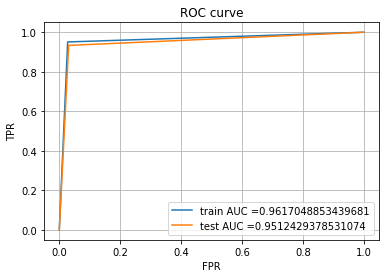

In [52]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_random, LR_best.predict(X_random))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , LR_best.predict(X_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [53]:
print("Train precision Score = ",precision_score(y_random , LR_best.predict(X_random)))
print("Test precision Score = ",precision_score(y_test , LR_best.predict(X_test)))

Train precision Score =  0.9718763374024333
Test precision Score =  0.3389830508474576


###Recall

In [54]:
print("Train recall Score = ",recall_score(y_random , LR_best.predict(X_random)))
print("Test recall Score = ",recall_score(y_test , LR_best.predict(X_test)))

Train recall Score =  0.9509272183449651
Test recall Score =  0.9333333333333333


###Confusion matrix train

Number of misclassified points  3.829511465603191
-------------------------------------------------- Confusion matrix --------------------------------------------------


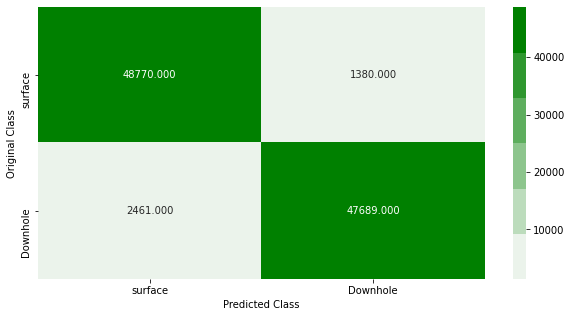

-------------------------------------------------- Precision matrix --------------------------------------------------


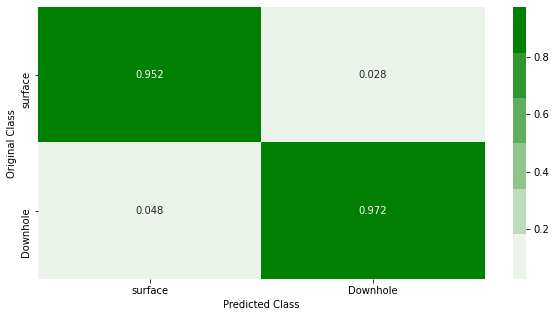

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


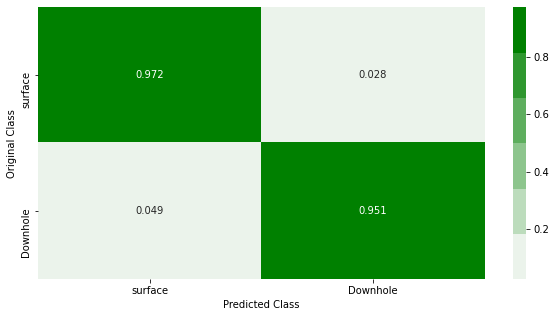

Sum of rows in precision matrix [1. 1.]


In [55]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_random, LR_best.predict(X_random) , lables)

###Confusion matrix test

Number of misclassified points  3.144444444444444
-------------------------------------------------- Confusion matrix --------------------------------------------------


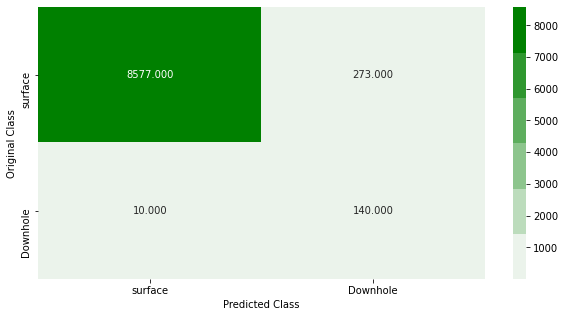

-------------------------------------------------- Precision matrix --------------------------------------------------


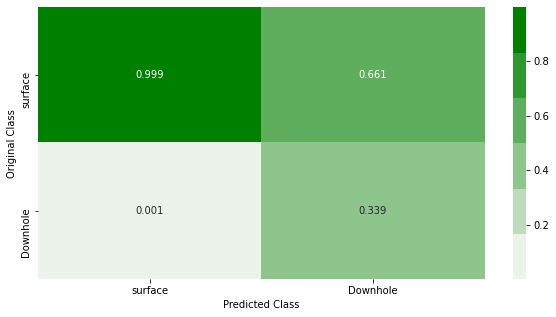

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


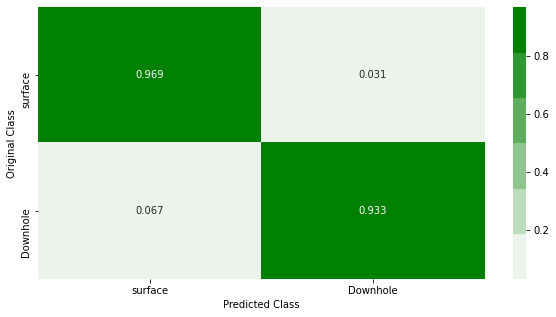

Sum of rows in precision matrix [1. 1.]


In [56]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test, LR_best.predict(X_test) , lables)

##On SMOTE over sampled

In [57]:
LR = LogisticRegression(class_weight="balanced" , max_iter = 1000)

parameters = {"C": [100 , 10 , 1.0 , 0.1 , 0.01] }

clf = GridSearchCV( LR , parameters , verbose=4 , cv=3 , scoring = "f1" , return_train_score = True)

clf.fit(X_smote,y_smote)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=100 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.1s remaining:    0.0s


[CV] ........... C=100, score=(train=0.960, test=0.958), total=  31.0s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV] ........... C=100, score=(train=0.960, test=0.960), total=  30.7s
[CV] C=100 ...........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV] ........... C=100, score=(train=0.959, test=0.960), total=  30.4s
[CV] C=10 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] ............ C=10, score=(train=0.960, test=0.958), total=  30.4s
[CV] C=10 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] ............ C=10, score=(train=0.960, test=0.960), total=  30.7s
[CV] C=10 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] ............ C=10, score=(train=0.960, test=0.960), total=  30.8s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.960, test=0.958), total=  21.6s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.960, test=0.960), total=  24.1s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.960, test=0.960), total=  24.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.959, test=0.958), total=  11.8s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.959, test=0.959), total=  11.7s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.959, test=0.959), total=  12.3s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=4)

In [58]:
#Creating dataframe for grid search cv results

results_df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["train_f1_score"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["cv_f1_score"])],axis=1)

train_cv_diffrence = abs(np.array(results_df['train_f1_score'].tolist()) - np.array(results_df['cv_f1_score'].tolist()))

results_df = pd.concat([results_df,pd.DataFrame(train_cv_diffrence, columns=["train_cv_diffrence"])],axis=1)

results_df

C  train_f1_score  cv_f1_score  train_cv_diffrence
0  100.00        0.959768     0.959468            0.000300
1   10.00        0.959827     0.959425            0.000402
2    1.00        0.959694     0.959191            0.000503
3    0.10        0.959052     0.958655            0.000397
4    0.01        0.957316     0.956985            0.000331

In [59]:
clf.best_params_

{'C': 100}

###f1 score

In [60]:
LR_best = LogisticRegression(class_weight="balanced" , max_iter = 1000 , C = 100)
LR_best.fit(X_smote,y_smote)

print("Train F1 Score = ",f1_score(y_smote , LR_best.predict(X_smote)))
print("Test F1 Score = ",f1_score(y_test , LR_best.predict(X_test)))

Train F1 Score =  0.959844716729346
Test F1 Score =  0.5139664804469274


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###AUC Score

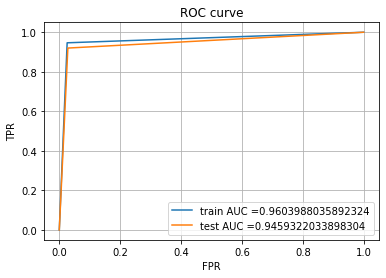

In [61]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_smote, LR_best.predict(X_smote))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , LR_best.predict(X_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [62]:
print("Train precision Score = ",precision_score(y_smote , LR_best.predict(X_smote)))
print("Test precision Score = ",precision_score(y_test , LR_best.predict(X_test)))

Train precision Score =  0.9734651191403847
Test precision Score =  0.35658914728682173


###Recall

In [63]:
print("Train recall Score = ",recall_score(y_smote , LR_best.predict(X_smote)))
print("Test recall Score = ",recall_score(y_test , LR_best.predict(X_test)))

Train recall Score =  0.9466001994017946
Test recall Score =  0.92


###Confusion matrix train

Number of misclassified points  3.9601196410767696
-------------------------------------------------- Confusion matrix --------------------------------------------------


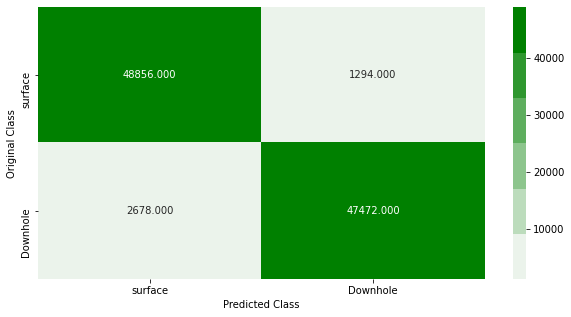

-------------------------------------------------- Precision matrix --------------------------------------------------


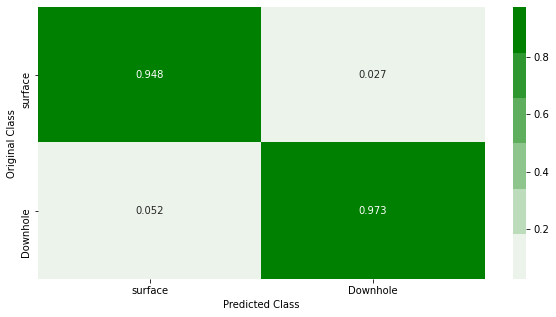

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


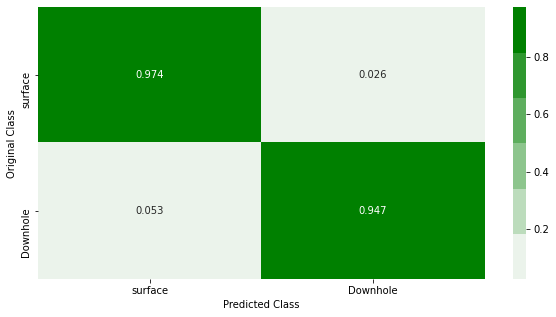

Sum of rows in precision matrix [1. 1.]


In [64]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_smote, LR_best.predict(X_smote) , lables)

###Confusion matrix test

Number of misclassified points  2.9000000000000004
-------------------------------------------------- Confusion matrix --------------------------------------------------


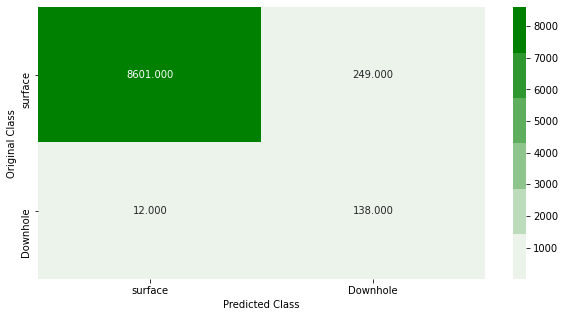

-------------------------------------------------- Precision matrix --------------------------------------------------


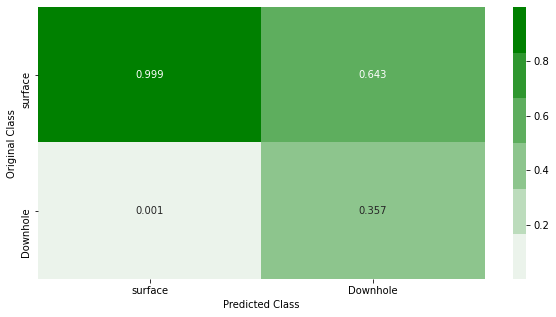

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


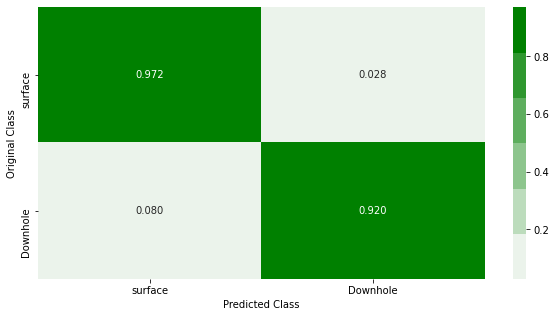

Sum of rows in precision matrix [1. 1.]


In [65]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test, LR_best.predict(X_test) , lables)

#Decision Tree

##On random over sampled

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(class_weight = "balanced")

parameters = { "max_depth":[1,5,10,50,100,500] , "min_samples_split":[2,10,100,500]}

clf = GridSearchCV( DT , parameters , verbose=4 , cv=3 , scoring = "f1" , return_train_score = True)

clf.fit(X_random,y_random)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_split=2, score=(train=0.935, test=0.934), total=   0.8s
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=2, score=(train=0.935, test=0.934), total=   0.8s
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=2, score=(train=0.934, test=0.936), total=   0.8s
[CV] max_depth=1, min_samples_split=10 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=10, score=(train=0.935, test=0.934), total=   0.8s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.935, test=0.934), total=   0.8s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.934, test=0.936), total=   0.8s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.935, test=0.934), total=   0.8s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.935, test=0.934), total=   0.8s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.934, test=0.936), total=   0.8s
[CV] max_depth=1, min_samples_split=500 ..............................
[CV]  max_depth=1, min_samples_split=500, s

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  8.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [67]:
#Creating dataframe for grid search cv results

results_df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["train_f1_score"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["cv_f1_score"])],axis=1)

train_cv_diffrence = abs(np.array(results_df['train_f1_score'].tolist()) - np.array(results_df['cv_f1_score'].tolist()))

results_df = pd.concat([results_df,pd.DataFrame(train_cv_diffrence, columns=["train_cv_diffrence"])],axis=1)

results_df

max_depth  min_samples_split  ...  cv_f1_score  train_cv_diffrence
0           1                  2  ...     0.934990        5.750181e-09
1           1                 10  ...     0.934990        5.750181e-09
2           1                100  ...     0.934990        5.750181e-09
3           1                500  ...     0.934990        5.750181e-09
4           5                  2  ...     0.966712        6.495252e-04
5           5                 10  ...     0.966817        5.449058e-04
6           5                100  ...     0.966665        6.304527e-04
7           5                500  ...     0.963533        6.224820e-04
8          10                  2  ...     0.980647        1.713908e-03
9          10                 10  ...     0.980618        1.757579e-03
10         10                100  ...     0.978974        1.852747e-03
11         10                500  ...     0.969871        1.753697e-03
12         50                  2  ...     0.996048        3.947354e-03
13         50                 10  ...     0.996245        3.749549e-03
14         50                100  ...     0.992307        3.916803e-03
15         50                500  ...     0.976870        3.216282e-03
16        100                  2  ...     0.995840        4.159973e-03
17        100                 10  ...     0.995949        4.051279e-03
18        100                100  ...     0.992341        3.970084e-03
19        100                500  ...     0.976948        3.304882e-03
20        500                  2  ...     0.995968        4.031519e-03
21        500                 10  ...     0.995899        4.100607e-03
22        500                100  ...     0.992297        3.921666e-03
23        500                500  ...     0.976714        3.332629e-03

[24 rows x 5 columns]

In [68]:
clf.best_params_

{'max_depth': 50, 'min_samples_split': 10}

###f1 score

In [69]:
DT_best = DecisionTreeClassifier(class_weight="balanced" , max_depth=50 , min_samples_split = 10)
DT_best.fit(X_random,y_random)

print("Train F1 Score = ",f1_score(y_random , DT_best.predict(X_random)))
print("Test F1 Score = ",f1_score(y_test , DT_best.predict(X_test)))

Train F1 Score =  0.9994419865279606
Test F1 Score =  0.6234567901234568


###AUC Score

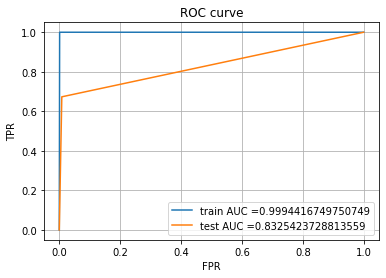

In [70]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_random, DT_best.predict(X_random))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , DT_best.predict(X_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [71]:
print("Train precision Score = ",precision_score(y_random , DT_best.predict(X_random)))
print("Test precision Score = ",precision_score(y_test , DT_best.predict(X_test)))

Train precision Score =  0.9988845954666773
Test precision Score =  0.5804597701149425


###Recall

In [72]:
print("Train recall Score = ",recall_score(y_random , DT_best.predict(X_random)))
print("Test recall Score = ",recall_score(y_test , DT_best.predict(X_test)))

Train recall Score =  1.0
Test recall Score =  0.6733333333333333


###Confusion matrix train

Number of misclassified points  0.05583250249252243
-------------------------------------------------- Confusion matrix --------------------------------------------------


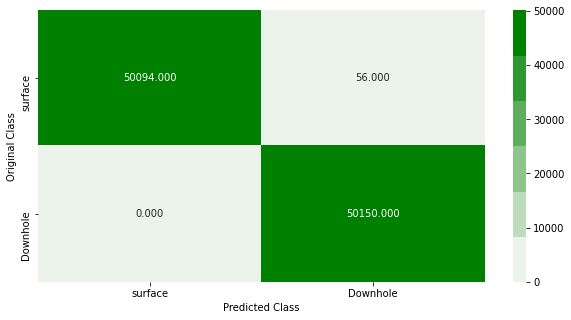

-------------------------------------------------- Precision matrix --------------------------------------------------


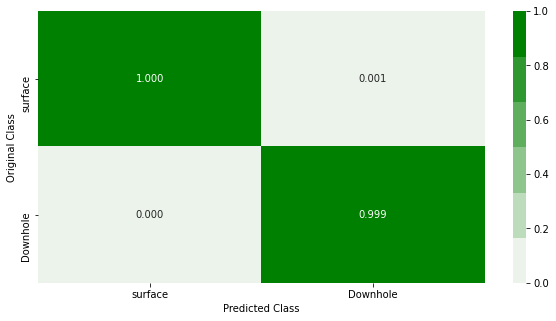

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


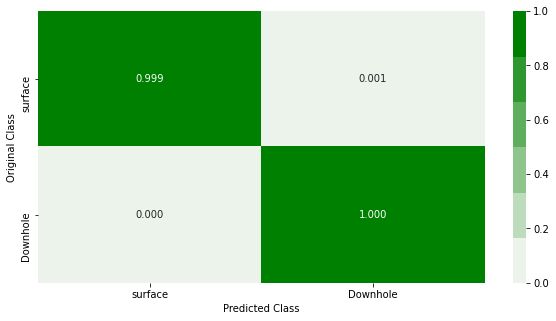

Sum of rows in precision matrix [1. 1.]


In [73]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_random , DT_best.predict(X_random) , lables)

###Confusion matrix test

Number of misclassified points  1.3555555555555554
-------------------------------------------------- Confusion matrix --------------------------------------------------


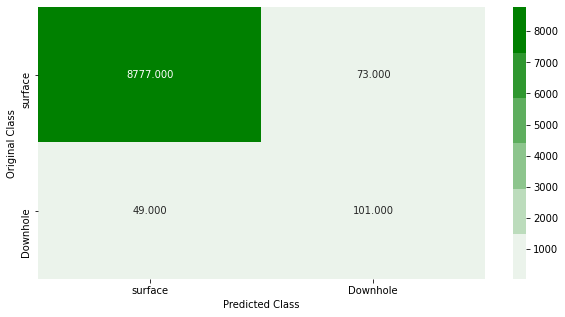

-------------------------------------------------- Precision matrix --------------------------------------------------


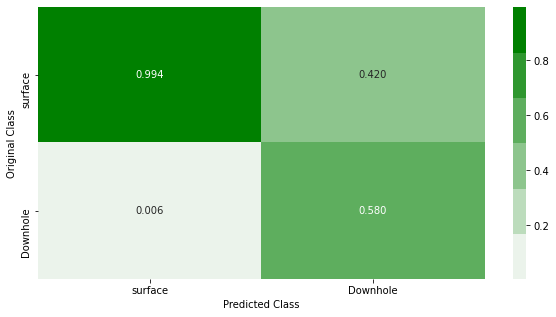

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


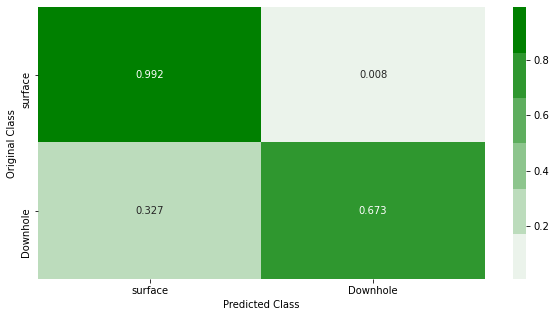

Sum of rows in precision matrix [1. 1.]


In [74]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test , DT_best.predict(X_test) , lables)

##On SMOTE over sampled

In [75]:
DT = DecisionTreeClassifier(class_weight = "balanced")

parameters = { "max_depth":[1,5,10,50,100,500] , "min_samples_split":[2,10,100,500]}

clf = GridSearchCV( DT , parameters , verbose=4 , cv=3 , scoring = "f1" , return_train_score = True)

clf.fit(X_smote,y_smote)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_split=2, score=(train=0.937, test=0.935), total=   1.1s
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=2, score=(train=0.936, test=0.937), total=   1.1s
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=2, score=(train=0.936, test=0.936), total=   1.1s
[CV] max_depth=1, min_samples_split=10 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=10, score=(train=0.937, test=0.935), total=   1.1s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.936, test=0.937), total=   1.1s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.936, test=0.936), total=   1.1s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.937, test=0.935), total=   1.1s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.936, test=0.937), total=   1.1s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.936, test=0.936), total=   1.1s
[CV] max_depth=1, min_samples_split=500 ..............................
[CV]  max_depth=1, min_samples_split=500, s

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 14.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [76]:
#Creating dataframe for grid search cv results

results_df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["train_f1_score"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["cv_f1_score"])],axis=1)

train_cv_diffrence = abs(np.array(results_df['train_f1_score'].tolist()) - np.array(results_df['cv_f1_score'].tolist()))

results_df = pd.concat([results_df,pd.DataFrame(train_cv_diffrence, columns=["train_cv_diffrence"])],axis=1)

results_df

max_depth  min_samples_split  ...  cv_f1_score  train_cv_diffrence
0           1                  2  ...     0.936174            0.000055
1           1                 10  ...     0.936174            0.000055
2           1                100  ...     0.936174            0.000055
3           1                500  ...     0.936174            0.000055
4           5                  2  ...     0.962715            0.001961
5           5                 10  ...     0.962716            0.001960
6           5                100  ...     0.962308            0.001797
7           5                500  ...     0.958425            0.001770
8          10                  2  ...     0.979427            0.005190
9          10                 10  ...     0.979323            0.005001
10         10                100  ...     0.974959            0.003587
11         10                500  ...     0.962264            0.002384
12         50                  2  ...     0.987678            0.012252
13         50                 10  ...     0.986695            0.011345
14         50                100  ...     0.978456            0.007915
15         50                500  ...     0.963371            0.004625
16        100                  2  ...     0.987529            0.012471
17        100                 10  ...     0.986369            0.011717
18        100                100  ...     0.978428            0.007938
19        100                500  ...     0.963401            0.004595
20        500                  2  ...     0.987795            0.012205
21        500                 10  ...     0.986793            0.011252
22        500                100  ...     0.978359            0.007992
23        500                500  ...     0.963403            0.004598

[24 rows x 5 columns]

In [77]:
clf.best_params_

{'max_depth': 500, 'min_samples_split': 2}

###f1 score

In [78]:
DT_best = DecisionTreeClassifier(class_weight="balanced" , max_depth=500 , min_samples_split = 2)
DT_best.fit(X_smote,y_smote)

print("Train F1 Score = ",f1_score(y_smote , DT_best.predict(X_smote)))
print("Test F1 Score = ",f1_score(y_test , DT_best.predict(X_test)))

Train F1 Score =  1.0
Test F1 Score =  0.5837563451776651


###AUC Score

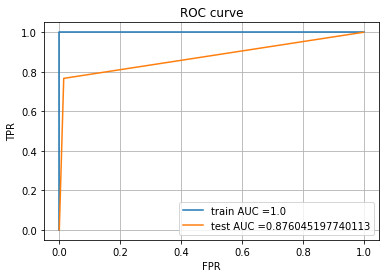

In [79]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_smote, DT_best.predict(X_smote))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , DT_best.predict(X_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [80]:
print("Train precision Score = ",precision_score(y_smote , DT_best.predict(X_smote)))
print("Test precision Score = ",precision_score(y_test , DT_best.predict(X_test)))

Train precision Score =  1.0
Test precision Score =  0.4713114754098361


###Recall

In [81]:
print("Train recall Score = ",recall_score(y_smote , DT_best.predict(X_smote)))
print("Test recall Score = ",recall_score(y_test , DT_best.predict(X_test)))

Train recall Score =  1.0
Test recall Score =  0.7666666666666667


###Confusion matrix train

Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


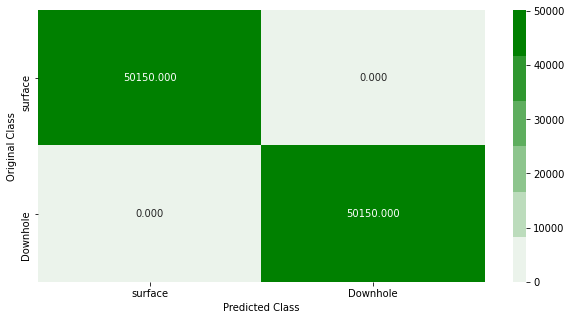

-------------------------------------------------- Precision matrix --------------------------------------------------


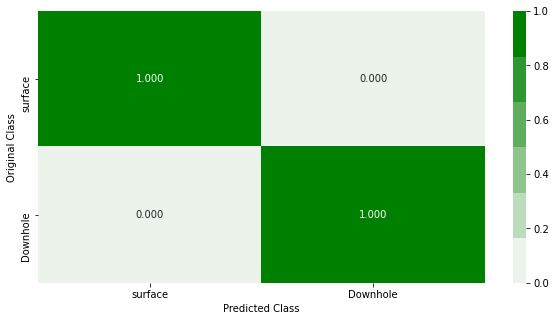

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


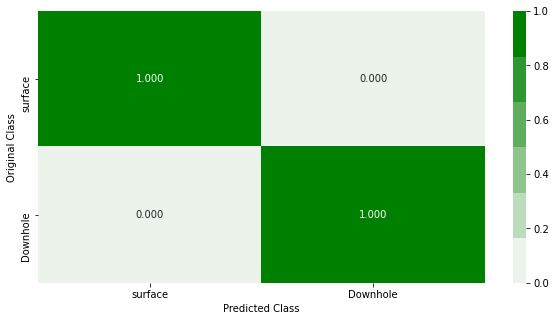

Sum of rows in precision matrix [1. 1.]


In [82]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_smote , DT_best.predict(X_smote) , lables)

###Confusion matrix test

Number of misclassified points  1.8222222222222224
-------------------------------------------------- Confusion matrix --------------------------------------------------


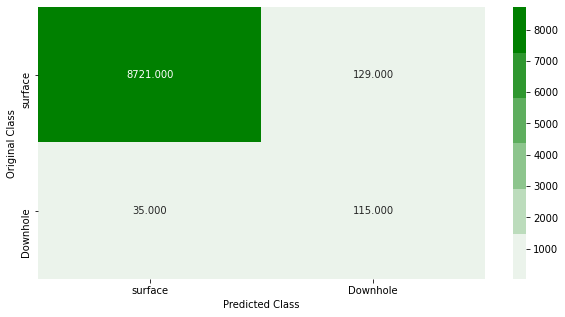

-------------------------------------------------- Precision matrix --------------------------------------------------


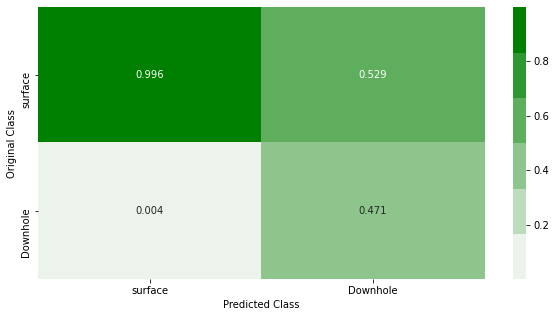

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


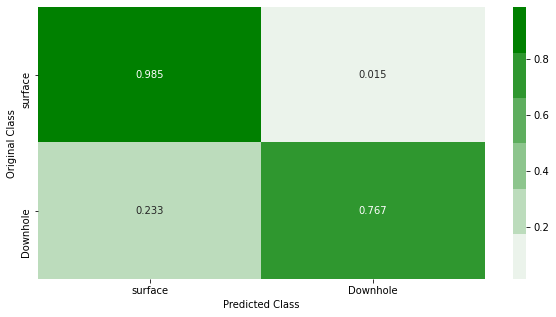

Sum of rows in precision matrix [1. 1.]


In [83]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test , DT_best.predict(X_test) , lables)

#Gradient Boosting

In [84]:
import xgboost as xgb

GB = xgb.XGBClassifier(max_depth=100,learning_rate=0.12,n_estimators=2000,colsample_bytree=0.4,subsample=0.4)

##On random over sampled

###F1 score

In [92]:
GB.fit(X_random,y_random)

print("Train F1 Score = ",f1_score(y_random , GB.predict(X_random)))
print("Test F1 Score = ",f1_score(y_test , GB.predict(X_test)))

Train F1 Score =  1.0
Test F1 Score =  0.819672131147541


###AUC Score

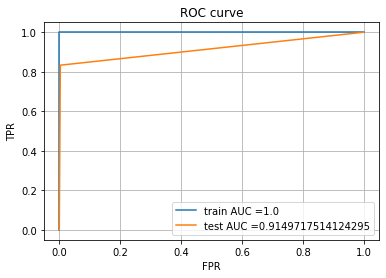

In [86]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_random, GB.predict(X_random))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , GB.predict(X_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [87]:
print("Train precision Score = ",precision_score(y_random , GB.predict(X_random)))
print("Test precision Score = ",precision_score(y_test , GB.predict(X_test)))

Train precision Score =  1.0
Test precision Score =  0.8064516129032258


###Recall

In [88]:
print("Train recall Score = ",recall_score(y_random , GB.predict(X_random)))
print("Test recall Score = ",recall_score(y_test , GB.predict(X_test)))

Train recall Score =  1.0
Test recall Score =  0.8333333333333334


###Confusion matrix train

Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


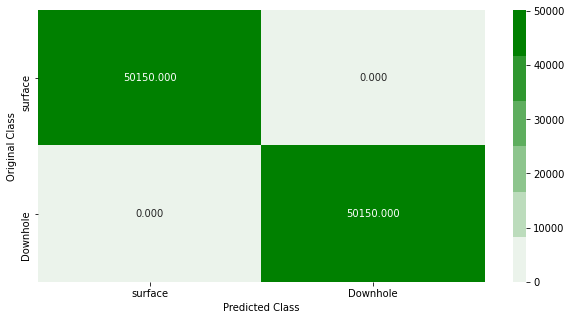

-------------------------------------------------- Precision matrix --------------------------------------------------


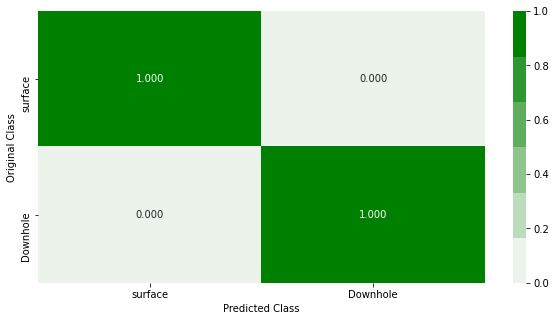

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


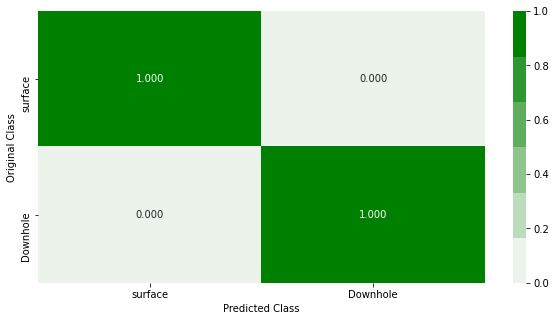

Sum of rows in precision matrix [1. 1.]


In [89]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_random , GB.predict(X_random) , lables)

###Confusion matrix test

Number of misclassified points  0.6111111111111112
-------------------------------------------------- Confusion matrix --------------------------------------------------


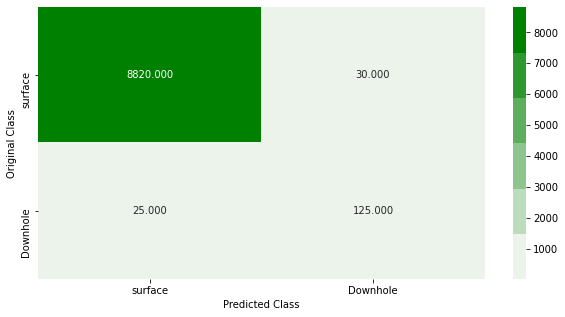

-------------------------------------------------- Precision matrix --------------------------------------------------


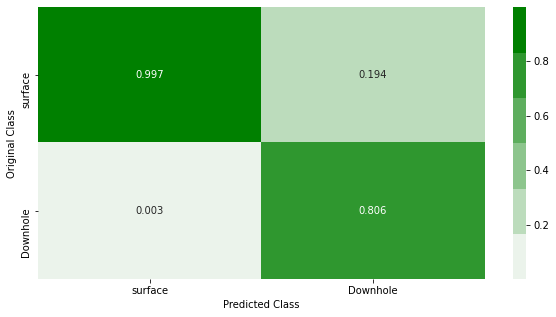

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


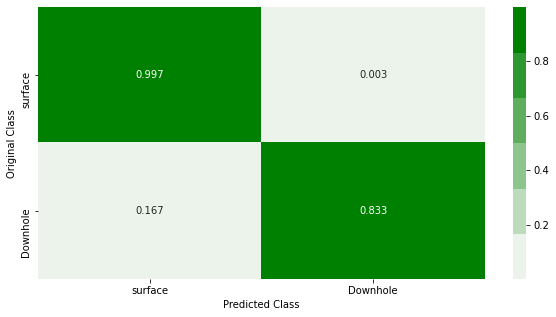

Sum of rows in precision matrix [1. 1.]


In [90]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test , GB.predict(X_test) , lables)

##On SMOTE over sampled

###F1 score

In [93]:
GB.fit(X_smote,y_smote)

print("Train F1 Score = ",f1_score(y_smote , GB.predict(X_smote)))
print("Test F1 Score = ",f1_score(y_test , GB.predict(X_test)))

Train F1 Score =  0.9999900298108655
Test F1 Score =  0.8201892744479495


###AUC Score

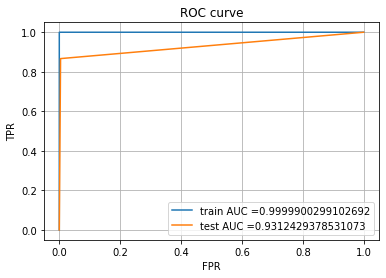

In [94]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_smote, GB.predict(X_smote))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , GB.predict(X_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [95]:
print("Train precision Score = ",precision_score(y_smote , GB.predict(X_smote)))
print("Test precision Score = ",precision_score(y_test , GB.predict(X_test)))

Train precision Score =  1.0
Test precision Score =  0.7784431137724551


###Recall

In [96]:
print("Train recall Score = ",recall_score(y_smote , GB.predict(X_smote)))
print("Test recall Score = ",recall_score(y_test , GB.predict(X_test)))

Train recall Score =  0.9999800598205384
Test recall Score =  0.8666666666666667


###Confusion matrix train

Number of misclassified points  0.0009970089730807576
-------------------------------------------------- Confusion matrix --------------------------------------------------


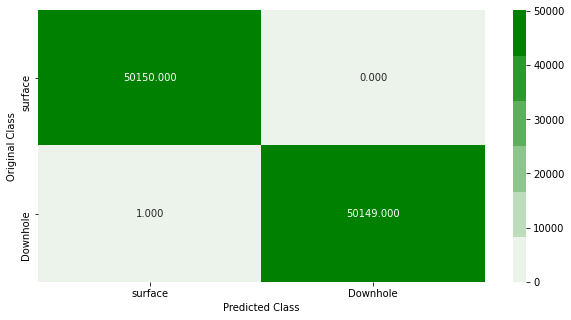

-------------------------------------------------- Precision matrix --------------------------------------------------


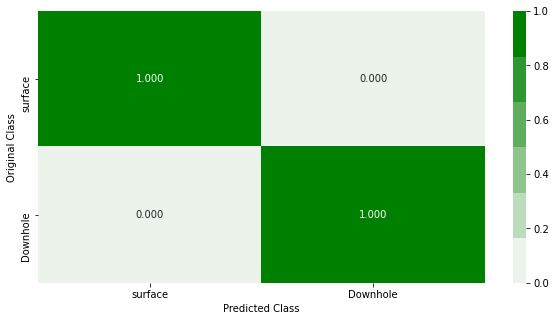

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


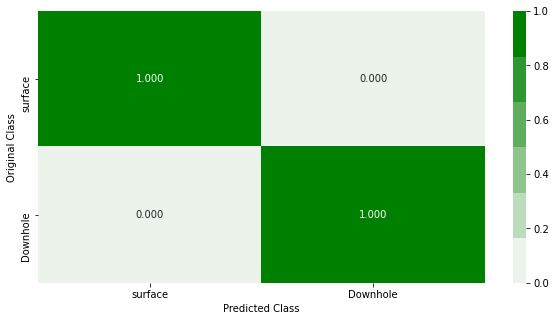

Sum of rows in precision matrix [1. 1.]


In [97]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_smote , GB.predict(X_smote) , lables)

###Confusion matrix test

Number of misclassified points  0.6333333333333333
-------------------------------------------------- Confusion matrix --------------------------------------------------


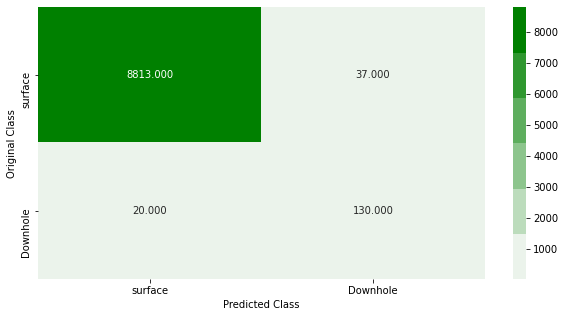

-------------------------------------------------- Precision matrix --------------------------------------------------


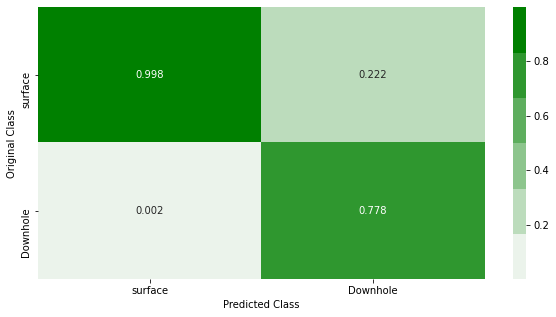

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


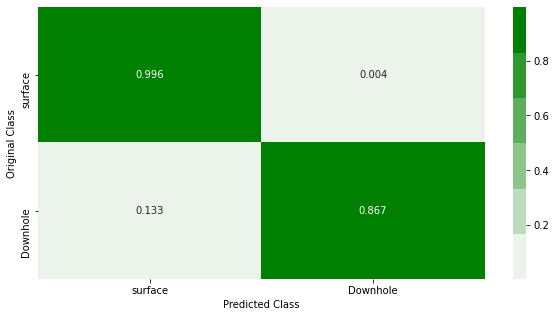

Sum of rows in precision matrix [1. 1.]


In [98]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test , GB.predict(X_test) , lables)

#Results

In [99]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["model", "dataset", "train f1","test f1", "test AUC","test precision","test recall"]
x.add_row(["Naive Bayes","Random over", 0.91, 0.3 ,0.915,0.18,0.9])
x.add_row(["Naive Bayes","SMOTE over", 0.91, 0.29 ,0.92,0.17,0.91])
x.add_row(["Logistic Regression","Random over", 0.96, 0.5 ,0.95,0.34,0.93])
x.add_row(["Logistic Regression","SMOTE over", 0.96, 0.51 ,0.94,0.35,0.92])
x.add_row(["Decision Tree","Random over", 0.99, 0.62 ,0.83,0.58,0.67])
x.add_row(["Decision Tree","SMOTE over", 1, 0.58 ,0.87,0.47,0.76])
x.add_row(["Gradient Boosting","Random over", 1, 0.82 ,0.91,0.8,0.83])
x.add_row(["Gradient Boosting","SMOTE over", 0.99, 0.82 ,0.93,0.78,0.866])

print(x)

+---------------------+-------------+----------+---------+----------+----------------+-------------+
|        model        |   dataset   | train f1 | test f1 | test AUC | test precision | test recall |
+---------------------+-------------+----------+---------+----------+----------------+-------------+
|     Naive Bayes     | Random over |   0.91   |   0.3   |  0.915   |      0.18      |     0.9     |
|     Naive Bayes     |  SMOTE over |   0.91   |   0.29  |   0.92   |      0.17      |     0.91    |
| Logistic Regression | Random over |   0.96   |   0.5   |   0.95   |      0.34      |     0.93    |
| Logistic Regression |  SMOTE over |   0.96   |   0.51  |   0.94   |      0.35      |     0.92    |
|    Decision Tree    | Random over |   0.99   |   0.62  |   0.83   |      0.58      |     0.67    |
|    Decision Tree    |  SMOTE over |    1     |   0.58  |   0.87   |      0.47      |     0.76    |
|  Gradient Boosting  | Random over |    1     |   0.82  |   0.91   |      0.8       |     